In [1]:
import praw
import pandas as pd
from time import gmtime, strftime

In [2]:
CLIENT_ID = 'YaYp_DsSRQvEIQ'
SECRET_KEY ='JUcJ28R8lKVlfIpwMlHWJWXX7uAtSg'

In [3]:
with open('pw.txt','r') as f:
    pw=f.read()

In [4]:
reddit = praw.Reddit(
    user_agent='MyBot/0.0.1',
    client_id=CLIENT_ID,
    client_secret=SECRET_KEY,
    username='callingsandesh',
    password=pw,
)

In [6]:
posts = []
ml_subreddit = reddit.subreddit('technology')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

In [7]:
def change_into_date(x):
    return strftime("%a, %d %b %Y %H:%M:%S", gmtime(x))

In [8]:
posts['created'] = posts['created'].apply(change_into_date)

In [9]:
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Giannis Antetokounmpo bounced the ball 3 times...,13449,ogyen6,sports,https://gfycat.com/shrillbruisedhawk,1646,,"Fri, 09 Jul 2021 15:51:27"
1,Every member of the Phoenix Suns' offense touc...,8397,oglyvl,sports,https://v.redd.it/kiikqc7zi3a71,261,,"Fri, 09 Jul 2021 02:16:07"
2,Mark Cavendish equals Eddy Merckx's all-time r...,337,ogxvz4,sports,http://news.sky.com/story/mark-cavendish-equal...,42,,"Fri, 09 Jul 2021 15:25:59"
3,Ohtani does it again! I feel he will get to 60.,13,ohbj4m,sports,https://youtu.be/fmMSIaova18,4,,"Sat, 10 Jul 2021 04:00:53"
4,'Sleeping Was Better Than Offing Myself': Simo...,26,oh6s5a,sports,https://atlantablackstar.com/2021/07/09/sleepi...,0,,"Fri, 09 Jul 2021 22:58:21"
5,Where tennis is played: Visualising the bounce...,76,ogxghf,sports,https://i.redd.it/hiiyhq9rc7a71.jpg,16,,"Fri, 09 Jul 2021 15:05:03"
6,The Billionaire Playbook: How Sports Owners Us...,10826,og6ho5,sports,https://www.propublica.org/article/the-billion...,945,,"Thu, 08 Jul 2021 12:46:37"
7,One of the most brilliant catch in history of ...,4,ohcw3y,sports,https://twitter.com/englandcricket/status/1413...,1,,"Sat, 10 Jul 2021 05:39:44"
8,Mark Cavendish equals Eddy Merckx's Tour de Fr...,17,oh3rsb,sports,https://www.bbc.com/sport/cycling/57725179,4,,"Fri, 09 Jul 2021 20:18:18"
9,Tokyo Olympics will be held without spectators...,4985,og78wb,sports,https://www.reuters.com/lifestyle/sports/tokyo...,689,,"Thu, 08 Jul 2021 13:30:47"


In [10]:
all_comments=[]
for post_id in posts.id:
    submission = reddit.submission(id=post_id)
    submission.comments.replace_more(limit=None)
    comment_per_post=[]
    for top_level_comment in submission.comments:
        comment_per_post.append(top_level_comment.body)
    all_comments.append(comment_per_post)

In [11]:
posts['comments'] = all_comments

In [12]:
posts.to_csv('hot sports 10 post and thier comments.csv',index=False)

In [14]:
type(posts.comments[0])

list

# using lexical/Rule base for sentiment analysis

In [265]:
post_number = 6

We will use the below post comment for sentimental analysis.

In [266]:
posts.iloc[post_number,:][0]

'The Billionaire Playbook: How Sports Owners Use Their Teams to Avoid Millions in Taxes'

In [267]:
posts.iloc[post_number,:]

title           The Billionaire Playbook: How Sports Owners Us...
score                                                       10826
id                                                         og6ho5
subreddit                                                  sports
url             https://www.propublica.org/article/the-billion...
num_comments                                                  945
body                                                             
created                                 Thu, 08 Jul 2021 12:46:37
comments        [[**Join Our Discord Server!**](https://discor...
Name: 6, dtype: object

#### total number of comments

In [268]:
len(posts.comments[post_number])

80

In [269]:
for i in range(len(posts.comments[post_number])):
    print(f"comment {i+1} : {posts.comments[post_number][i]}")
    print("----------------------------------------------\n")

comment 1 : [**Join Our Discord Server!**](https://discord.gg/233aU5q)

**Welcome to /r/sports**

We created a Discord server for our community and would like to invite all of you to join! You'll be able to discuss sports with users around the world and discuss events in real time!

There are separate channels for many sports you can opt in and out of, including;

American Football, Soccer, Baseball, Basketball, Aussie Rules Football, Rugby Union and League, Cricket, Motorsports, Fitness, and many more.

[**Reddit Sports Discord Server**](https://discord.gg/233aU5q)
----------------------------------------------

comment 2 : It's also mind boggling to me that owners expect fans to pay for their team's new stadiums (and also that many fans are often ok with this). "Hey! let's build this billionaire's business so that they don't have to use their own money and so that they can make a huge profit off of us...and then ask us to pay for another one in about twenty years! Yay!"
-------------

## visualizing all comments of the post with most occurance of word using word cloud

In [270]:
from nltk import word_tokenize

In [271]:
len(posts.comments[post_number])

80

In [272]:
words=[]
for comment in posts.comments[post_number]:
    z=word_tokenize(comment)
    for item in z:
        if item.isalnum():
            words.append(item)

In [273]:
sent = ""
for item in words:
    sent +=item+" "

In [274]:
from wordcloud import WordCloud, STOPWORDS

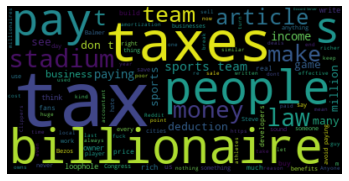

In [275]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt


# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(sent)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

#### using textblob

In [276]:
# Import the required packages
from textblob import TextBlob

In [277]:
total_polarity=[]
i=1
for comment in posts.comments[post_number]:
    # Create a textblob object  
    comm = TextBlob(comment)
    # Print out the sentiment
    print(f"comment {i} : {comment}")
    print("\n")
    print(comm.sentiment)
    total_polarity.append(comm.sentiment[0])
    print("---------------------------------------------------\n")

comment 1 : [**Join Our Discord Server!**](https://discord.gg/233aU5q)

**Welcome to /r/sports**

We created a Discord server for our community and would like to invite all of you to join! You'll be able to discuss sports with users around the world and discuss events in real time!

There are separate channels for many sports you can opt in and out of, including;

American Football, Soccer, Baseball, Basketball, Aussie Rules Football, Rugby Union and League, Cricket, Motorsports, Fitness, and many more.

[**Reddit Sports Discord Server**](https://discord.gg/233aU5q)


Sentiment(polarity=0.4642857142857143, subjectivity=0.47500000000000003)
---------------------------------------------------

comment 1 : It's also mind boggling to me that owners expect fans to pay for their team's new stadiums (and also that many fans are often ok with this). "Hey! let's build this billionaire's business so that they don't have to use their own money and so that they can make a huge profit off of us...a

#### Above . the polarity of 1 means the comment is totally positive and -1 means the totally negative.
#### The subjectivity ranges from 0-1 and 0 means the comment is objective and 1 means the the comment is subjective

In [278]:
import numpy as np
sum(np.array(total_polarity)<0)/len(total_polarity)

0.275

In [279]:
print(f"total negative sentiments: {sum(np.array(total_polarity)<0)}")

total negative sentiments: 22


In [280]:
print(f"total positive sentiments: {sum(np.array(total_polarity)>0)}")

total positive sentiments: 32


In [281]:
print(f"total neutral sentiments: {sum(np.array(total_polarity)==0)}")

total neutral sentiments: 26


#### VADER Sentiment Analysis 

In [282]:
import nltk

In [283]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


In [284]:
vader_ratings=[]
for comment in all_comments[post_number]: 
    compound = sid.polarity_scores(comment)['compound']
    print(f"comment {i} : {comment}")
    print("\n")
    print(compound)
    vader_ratings.append(compound)
    print("---------------------------------------------------\n")

comment 1 : [**Join Our Discord Server!**](https://discord.gg/233aU5q)

**Welcome to /r/sports**

We created a Discord server for our community and would like to invite all of you to join! You'll be able to discuss sports with users around the world and discuss events in real time!

There are separate channels for many sports you can opt in and out of, including;

American Football, Soccer, Baseball, Basketball, Aussie Rules Football, Rugby Union and League, Cricket, Motorsports, Fitness, and many more.

[**Reddit Sports Discord Server**](https://discord.gg/233aU5q)


0.2905
---------------------------------------------------

comment 1 : It's also mind boggling to me that owners expect fans to pay for their team's new stadiums (and also that many fans are often ok with this). "Hey! let's build this billionaire's business so that they don't have to use their own money and so that they can make a huge profit off of us...and then ask us to pay for another one in about twenty years! Yay!"

In [285]:
print(f"total negative sentiments: {sum(np.array(vader_ratings)<0)}")

total negative sentiments: 27


In [286]:
print(f"total positive sentiments: {sum(np.array(vader_ratings)>0)}")

total positive sentiments: 29


In [287]:
print(f"total neutral sentiments: {sum(np.array(vader_ratings)==0)}")

total neutral sentiments: 24


#### Flair sentiment analysis

In [288]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2021-07-10 16:55:23,165 loading file C:\Users\lfc\.flair\models\sentiment-en-mix-distillbert_4.pt


In [289]:
flair_ratings=[]
for comment in posts.comments[post_number]:
    s = flair.data.Sentence(comment)
    flair_sentiment.predict(s)
    total_sentiment = s.labels
    print(f"comment {i} : {comment}")
    print("\n")
    print(total_sentiment)
    flair_ratings.append(total_sentiment)
    print("---------------------------------------------------\n")

comment 1 : [**Join Our Discord Server!**](https://discord.gg/233aU5q)

**Welcome to /r/sports**

We created a Discord server for our community and would like to invite all of you to join! You'll be able to discuss sports with users around the world and discuss events in real time!

There are separate channels for many sports you can opt in and out of, including;

American Football, Soccer, Baseball, Basketball, Aussie Rules Football, Rugby Union and League, Cricket, Motorsports, Fitness, and many more.

[**Reddit Sports Discord Server**](https://discord.gg/233aU5q)


[POSITIVE (0.9795)]
---------------------------------------------------

comment 1 : It's also mind boggling to me that owners expect fans to pay for their team's new stadiums (and also that many fans are often ok with this). "Hey! let's build this billionaire's business so that they don't have to use their own money and so that they can make a huge profit off of us...and then ask us to pay for another one in about twenty

comment 1 : Can we just all admit. People dont like to pay more for anything if they dont have too. People act like its so immoral to not pay your "fair share" in taxes. I dont blame rich people for finding every loophole they can to lower their tax burden. 

I do blame the government for allowing loopholes to exist. Everytime is see a fuck this rich person post for not paying their taxes legally. Im like, i mean i wouldnt either if there was a way i didnt have to.\\

The fault sits on washington, not the rich people


[NEGATIVE (1.0)]
---------------------------------------------------

comment 1 : Bob Nutter who owns the Pittsburgh Pirates could teach a master class on this topic.


[POSITIVE (0.634)]
---------------------------------------------------

comment 1 : Fuck the glazers. Green and gold till we’re sold


[NEGATIVE (0.9984)]
---------------------------------------------------

comment 1 : stadiums are usually subsidized when being built too


[NEGATIVE (0.8496)]
-----------

comment 1 : The game is rigged.  This isn't capitalism, this is an oligarchy where the rules are set to make the rich richer,  keep the poor, poor, and  extinguish the middle-class.


[NEGATIVE (0.9799)]
---------------------------------------------------

comment 1 : Can we talk about how many jobs they generate?


[POSITIVE (0.9762)]
---------------------------------------------------

comment 1 : So? Sounds smart financially.


[POSITIVE (0.9292)]
---------------------------------------------------

comment 1 : Its time for the players and the fans to seize the means.


[POSITIVE (0.8967)]
---------------------------------------------------

comment 1 : >“Steve has always paid the taxes he owes, and has publicly noted that he would personally be fine with paying more.”

OK, so why aren't you paying more?


[NEGATIVE (0.5255)]
---------------------------------------------------

comment 1 : In Cleveland we have a “sin” tax on liquor, beer, wine and tobacco to pay for the stadium and 

In [290]:
flair_ratings_score=[]
for i in range(len(flair_ratings)):
    if flair_ratings[i][0].value == 'POSITIVE':
        flair_ratings_score.append(flair_ratings[i][0].score)
    else:
        s=-1*flair_ratings[i][0].score
        flair_ratings_score.append(s)

In [291]:
print(f"total negative sentiments comment: {sum(np.array(flair_ratings_score)<0)} \n total average negavite sentiments:{np.mean(np.array(flair_ratings_score)<0) }")

total negative sentiments comment: 57 
 total average negavite sentiments:0.7125


In [292]:
print(f"total positive sentiments comments: {sum(np.array(flair_ratings_score)>0)}\n total average positive sentiments:{np.mean(np.array(flair_ratings_score)>0) }")

total positive sentiments comments: 23
 total average positive sentiments:0.2875
